In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X = df.iloc[:, :-1]
Y = df['class']
X.shape, Y.shape

((1372, 4), (1372,))

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y, random_state = 100)
Xtrain.shape, Xtest.shape

((1029, 4), (343, 4))

In [13]:
def ANN_model():
  inputs = Input(shape = (4, ))
  h1 = Dense(units = 16, activation = 'relu')(inputs)
  h2 = Dense(units = 16, activation = 'relu')(h1)
  h2 = Dropout(0.2)(h2)
  out = Dense(units = 1, activation = 'sigmoid')(h2)
  model = Model(inputs = inputs, outputs = out)
  return model

In [14]:
model = ANN_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [16]:
hist = model.fit(Xtrain, Ytrain, epochs = 10, batch_size = 32)

Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 0.9293 - accuracy: 0.4781
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6735
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7813
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8571
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8941
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9339
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9563
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9718
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9815
Epoch 10/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9845


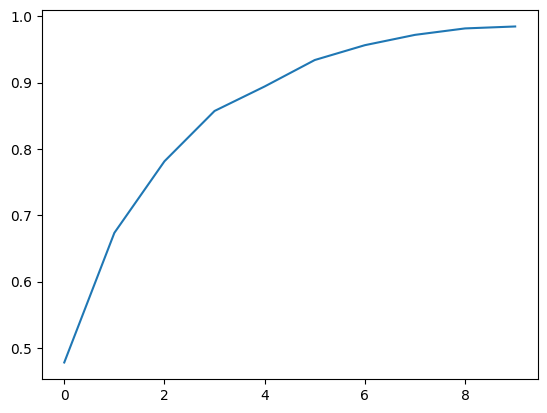

In [21]:
epochs = range(10)
accuracy = hist.history['accuracy']
plt.plot(epochs, accuracy)

In [23]:
Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
Ypred

11/11 [==============================] - 0s 6ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [25]:
accuracy_score(Ytest, Ypred)

0.9883381924198251

In [26]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       191
           1       0.99      0.98      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



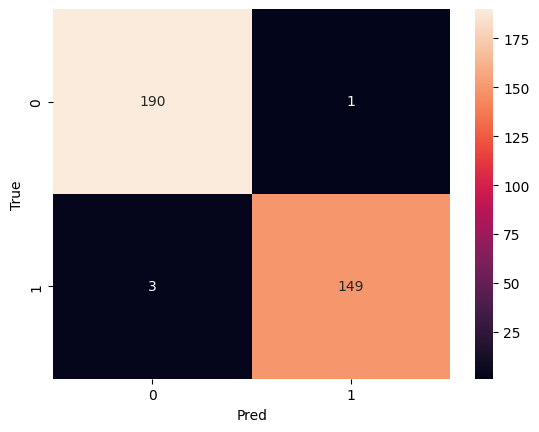

In [29]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [31]:
model.save('/content/drive/MyDrive/datasets/bna.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
